# Polynomial Regression

In [21]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## Sample Dataset

### Training Dataset

In [22]:
import pandas as pd

Rumah = {'pajak rumah': [296.0, 242.0, 242.0, 222.0, 222.0],
         'hektar' : [2.31, 7.07, 7.07, 2.18, 2.18],
        'harga' : [24, 21.6, 34.7, 33.4, 36.2]}

train_Rumah_df = pd.DataFrame(Rumah)
train_Rumah_df

,pajak rumah,hektar,harga
0,296.0,2.31,24.0
1,242.0,7.07,21.6
2,242.0,7.07,34.7
3,222.0,2.18,33.4
4,222.0,2.18,36.2


Daftar pajak rumah, hektar dan harga. Pajak rumah = features. Harga rumah = target. Alasan mengambil features tersebut untuk mengetahui harga rumah bila diketahui pajak dan luas/hektar nya.

### Preprocessing Dataset

In [23]:
import numpy as np

X_train = np.array(train_Rumah_df['pajak rumah']).reshape(-1, 1)
y_train = np.array(train_Rumah_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[296.]
 [242.]
 [242.]
 [222.]
 [222.]]

y_train: [24.  21.6 34.7 33.4 36.2]


Feature yang digunakan hanya satu, yaitu pajak rumah dan targetnya adalah harga rumah. 

### Polynomial Features

In [24]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[1.0000e+00 2.9600e+02 8.7616e+04]
 [1.0000e+00 2.4200e+02 5.8564e+04]
 [1.0000e+00 2.4200e+02 5.8564e+04]
 [1.0000e+00 2.2200e+02 4.9284e+04]
 [1.0000e+00 2.2200e+02 4.9284e+04]]



### Training Model

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

### Visualisasi Model

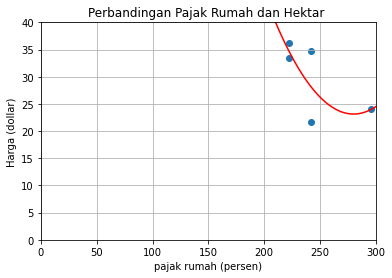

In [26]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 300, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Pajak Rumah dan Hektar ')
plt.xlabel('pajak rumah (persen)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 300)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

### Polynomial Regression: Quadratic vs Cubic

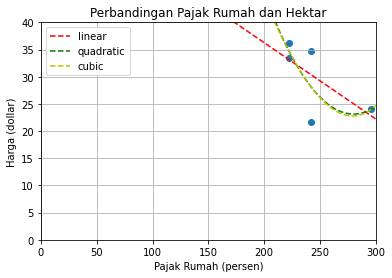

In [27]:
# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 300, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Pajak Rumah dan Hektar')
plt.xlabel('Pajak Rumah (persen)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.xlim(0, 300)
plt.ylim(0, 40)
plt.grid(True)
plt.show()